In [1]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("..\\data\\genus.reabund_complete.csv")
df.head()

,Unnamed: 0,Enterobacteriaceae_unclassified,Dorea,Betaproteobacteria_unclassified,Ruminiclostridium_6,Denitratisoma,Howardella,Selenomonas,Fastidiosipila,Porphyromonadaceae_unclassified,...,Parabacteroides,Selenomonadales_unclassified,Dysgonomonas,Gordonia,Planococcaceae_unclassified,Tyzzerella,Prevotella_9,Lactobacillus,Desulfovibrio,diagnosis
0,1063714,0.157034,0.160174,1.290816,0.000000,0.0,0.0,0.0,0.0,0.384209,...,0.025125,0.0,0.0,0.000000,0.000000,0.000000,10.193570,11.375509,0.112017,1
1,3314627,10.143104,0.393884,1.114063,0.009323,0.0,0.0,0.0,0.0,0.501095,...,0.191115,0.0,0.0,0.000000,0.000000,0.000000,23.798536,0.000000,0.291335,0
2,3940838,1.771959,0.005998,0.123386,0.017137,0.0,0.0,0.0,0.0,0.200502,...,0.244201,0.0,0.0,0.005998,0.026562,0.000000,12.349731,0.038558,0.005998,1
3,4380559,28.060760,0.003138,0.064861,0.000000,0.0,0.0,0.0,0.0,0.008369,...,1.021038,0.0,0.0,0.000000,0.000000,0.024061,0.112984,0.011508,0.000000,0
4,5254362,65.635131,0.000000,0.019221,0.003844,0.0,0.0,0.0,0.0,0.016658,...,0.003844,0.0,0.0,0.000000,0.000000,0.000000,0.421584,7.273286,0.000000,0


In [3]:
# Change col to id
df.rename(columns={"Unnamed: 0":"id"}, inplace=True)
# Set id col to be the index
df.set_index('id', inplace=True)
print(df.shape)
df.head()

(129, 206)


,Enterobacteriaceae_unclassified,Dorea,Betaproteobacteria_unclassified,Ruminiclostridium_6,Denitratisoma,Howardella,Selenomonas,Fastidiosipila,Porphyromonadaceae_unclassified,Clostridiales_unclassified,...,Parabacteroides,Selenomonadales_unclassified,Dysgonomonas,Gordonia,Planococcaceae_unclassified,Tyzzerella,Prevotella_9,Lactobacillus,Desulfovibrio,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
1063714,0.157034,0.160174,1.290816,0.000000,0.0,0.0,0.0,0.0,0.384209,0.097361,...,0.025125,0.0,0.0,0.000000,0.000000,0.000000,10.193570,11.375509,0.112017,1
3314627,10.143104,0.393884,1.114063,0.009323,0.0,0.0,0.0,0.0,0.501095,0.414860,...,0.191115,0.0,0.0,0.000000,0.000000,0.000000,23.798536,0.000000,0.291335,0
3940838,1.771959,0.005998,0.123386,0.017137,0.0,0.0,0.0,0.0,0.200502,0.289614,...,0.244201,0.0,0.0,0.005998,0.026562,0.000000,12.349731,0.038558,0.005998,1
4380559,28.060760,0.003138,0.064861,0.000000,0.0,0.0,0.0,0.0,0.008369,0.047077,...,1.021038,0.0,0.0,0.000000,0.000000,0.024061,0.112984,0.011508,0.000000,0
5254362,65.635131,0.000000,0.019221,0.003844,0.0,0.0,0.0,0.0,0.016658,0.008970,...,0.003844,0.0,0.0,0.000000,0.000000,0.000000,0.421584,7.273286,0.000000,0


# Feature Selection

,Enterococcus,Chitinophagaceae_unclassified,Subgroup_6_ge,Sphingomonadaceae_unclassified,Methylobacterium,Sphingomonas
Chitinophagaceae_unclassified,0.534239,NaN,0.654026,0.807585,NaN,NaN
Enterococcus,NaN,0.534239,NaN,NaN,NaN,NaN
Sphingomonadaceae_unclassified,NaN,0.807585,0.597533,NaN,NaN,NaN
Subgroup_6_ge,NaN,0.654026,NaN,0.597533,NaN,NaN
Sphingomonas,NaN,NaN,NaN,NaN,0.798305,NaN
Methylobacterium,NaN,NaN,NaN,NaN,NaN,0.798305


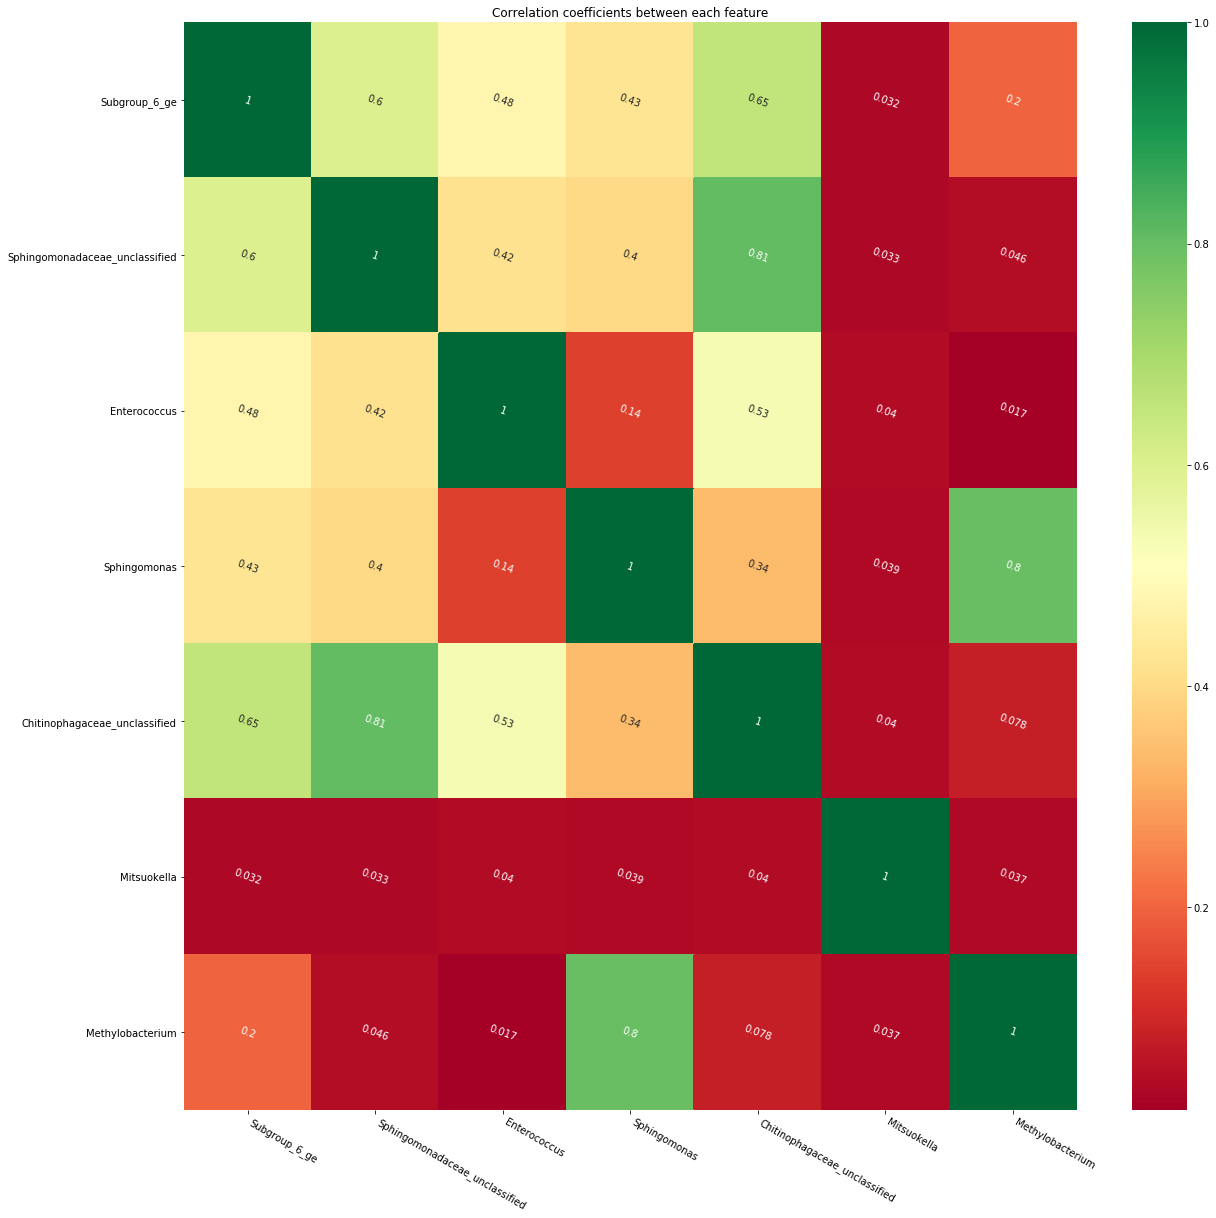

In [54]:
def indep_feat(features: list) -> list:
    """ find independent features among each other """
    
    # corr coefs matrix
    corr_feat_mtx = df[features].corr().abs()
    corr_list = corr_feat_mtx.unstack()
    corr_list = corr_list.sort_values(kind='quicksort')
    #corr_list = corr_list[corr_list < 0.3]
    
    # plot the corr coefs matrix
    plt.figure(figsize=(20,20))
    hm = sns.heatmap(corr_feat_mtx,
                     cmap='RdYlGn',
                     annot=True,
                     annot_kws={'rotation':340, 'ha':'center'},fmt='.2g')
    plt.xticks(rotation=330, ha='left')
    plt.title("Correlation coefficients between each feature")
    return corr_list

relv_feat = corr_output_mtx[corr_output_mtx > .2]

# select features that are independent of each other
relv_feat = indep_feat(relv_feat.index.drop('diagnosis'))
relv_feat[relv_feat.between(.5, 1, inclusive=False)].unstack()

##############################################################################################
##  TODO: select independent features                                                       ##
##  Remove those features that are highly correlated with some other feat                   ##
##  Keep the ones that are more correlated with the class when removing dependent features  ##
##############################################################################################

Features with correlation > 0.14: 33
Index(['Enterobacteriaceae_unclassified', 'Dorea',
       'Porphyromonadaceae_unclassified', 'Subgroup_6_ge',
       'Proteobacteria_unclassified', 'Rothia',
       'Sphingomonadaceae_unclassified', 'Faecalibacterium', 'Actinobacillus',
       'Mitochondria_ge', 'Peptostreptococcaceae_unclassified', 'Enterococcus',
       'Neisseriaceae_unclassified', 'Haemophilus', 'Sphingomonas',
       'Terrisporobacter', 'Chitinophagaceae_unclassified',
       'Rhodospirillales_unclassified', 'Chloroplast_ge',
       'Enterococcaceae_unclassified', 'Campylobacter', 'Mitsuokella',
       'Bacillaceae_unclassified', 'Lachnospiraceae_NK4A136_group',
       'Coriobacteriaceae_unclassified', 'Fusobacterium', 'Fusicatenibacter',
       'Lactobacillales_unclassified', 'Providencia', 'Subgroup_17_ge',
       'Bacillales_unclassified', 'Methylobacterium'],
      dtype='object')
Independent features with correlation > 0.14: 822


KeyError: "None of [MultiIndex(levels=[['Enterobacteriaceae_unclassified', 'Dorea', 'Porphyromonadaceae_unclassified', 'Subgroup_6_ge', 'Proteobacteria_unclassified', 'Rothia', 'Sphingomonadaceae_unclassified', 'Faecalibacterium', 'Actinobacillus', 'Mitochondria_ge', 'Peptostreptococcaceae_unclassified', 'Enterococcus', 'Neisseriaceae_unclassified', 'Haemophilus', 'Sphingomonas', 'Terrisporobacter', 'Chitinophagaceae_unclassified', 'Rhodospirillales_unclassified', 'Chloroplast_ge', 'Enterococcaceae_unclassified', 'Campylobacter', 'Mitsuokella', 'Bacillaceae_unclassified', 'Lachnospiraceae_NK4A136_group', 'Coriobacteriaceae_unclassified', 'Fusobacterium', 'Fusicatenibacter', 'Lactobacillales_unclassified', 'Providencia', 'Subgroup_17_ge', 'Bacillales_unclassified', 'Methylobacterium'], ['Enterobacteriaceae_unclassified', 'Dorea', 'Porphyromonadaceae_unclassified', 'Subgroup_6_ge', 'Proteobacteria_unclassified', 'Rothia', 'Sphingomonadaceae_unclassified', 'Faecalibacterium', 'Actinobacillus', 'Mitochondria_ge', 'Peptostreptococcaceae_unclassified', 'Enterococcus', 'Neisseriaceae_unclassified', 'Haemophilus', 'Sphingomonas', 'Terrisporobacter', 'Chitinophagaceae_unclassified', 'Rhodospirillales_unclassified', 'Chloroplast_ge', 'Enterococcaceae_unclassified', 'Campylobacter', 'Mitsuokella', 'Bacillaceae_unclassified', 'Lachnospiraceae_NK4A136_group', 'Coriobacteriaceae_unclassified', 'Fusobacterium', 'Fusicatenibacter', 'Lactobacillales_unclassified', 'Providencia', 'Subgroup_17_ge', 'Bacillales_unclassified', 'Methylobacterium']],\n           codes=[[25, 9, 10, 5, 11, 23, 2, 10, 16, 2, 27, 26, 8, 17, 11, 20, 26, 9, 15, 16, 10, 13, 2, 29, 27, 28, 3, 15, 22, 19, 6, 2, 20, 10, 30, 23, 25, 14, 8, 4, 23, 1, 31, 7, 2, 14, 17, 0, 22, 23, 7, 15, 26, 30, 19, 1, 19, 4, 22, 10, 6, 15, 20, 2, 9, 19, 19, 23, 10, 9, 21, 26, 29, 23, 23, 24, 19, 31, 10, 12, 8, 16, 26, 4, 18, 10, 4, 12, 4, 15, 4, 2, 15, 0, 17, 2, 12, 22, 14, 23, 18, 23, 8, 28, 26, 24, 10, 3, 28, 12, 0, 31, 8, 11, 0, 9, 10, 23, 19, 2, 15, 2, 0, 29, 19, 25, 3, 23, 2, 12, 21, 10, 27, 22, 15, 14, 9, 7, 13, 22, 13, 2, 14, 10, 11, 31, 23, 9, 5, 2, 19, 20, 0, 6, 1, 15, 7, 30, 17, 28, 13, 23, 15, 24, 25, 11, 14, 7, 7, 17, 28, 23, 29, 10, 4, 13, 17, 23, 0, 25, 26, 23, 18, 22, 22, 8, 18, 15, 21, 22, 12, 23, 10, 26, 17, 4, 11, 10, 0, 18, 22, 2, 4, 5, 28, 22, 7, 20, 2, 27, 0, 3, 20, 22, 15, 29, 13, 21, 21, 29, 9, 2, 30, 19, 6, 25, 19, 21, 29, 28, 28, 19, 5, 28, 20, 0, 5, 22, 8, 7, 28, 13, 1, 24, 24, 21, 22, 25, 5, 23, 0, 11, 20, 4, 12, 21, 23, 31, 21, 1, 6, 10, 4, 22, 20, 16, 23, 16, 28, 6, 30, 25, 24, 2, 21, 9, 10, 4, 11, 15, 6, 23, 10, 27, 19, 15, 3, 21, 21, 6, 21, 17, 28, 4, 27, 17, 28, 15, 20, 3, 17, 19, 28, 21, 0, 19, 3, 25, 28, 11, 5, 21, 10, 19, 4, 21, 4, 25, 31, 21, 24, 13, 11, 24, 24, 19, 15, 23, 14, 21, 10, 16, 21, 30, 23, 2, 21, 16, 15, 9, 21, 11, 18, 21, 27, 25, 23, 25, 29, 8, 6, 22, 24, 7, 16, 26, 26, 31, 0, 30, 17, 26, 28, 16, 29, 24, 28, 25, 24, 22, 25, 21, 9, 28, 20, 23, 30, 28, 20, 29, 1, 10, 14, 28, 15, 10, 4, 29, 23, 8, 6, 31, 4, 7, 19, 8, 25, 1, 21, 8, 15, 21, 5, 24, 16, 25, 6, 24, 10, 28, 3, 28, 15, 17, 22, 15, 25, 17, 28, 31, 3, 2, 3, 8, 22, 26, 29, 26, 31, 24, 20, 21, 22, 0, 25, 12, 0, 14, 27, 23, 1, 16, 12, 24, 18, 26, 22, 31, 20, 28, 24, 10, 28, 18, 2, 30, 24, 20, 13, 26, 25, 10, 1, 17, 15, 30, 24, 28, 24, 25, 10, 31, 2, 21, 7, 23, 6, 20, 26, 6, 26, 12, 16, 24, 4, 24, 10, 30, 3, 26, 2, 7, 24, 17, 22, 1, 1, 31, 1, 13, 1, 30, 11, 26, 24, 14, 11, 12, 8, 25, 7, 27, 31, 27, 25, 18, 17, 10, 26, 19, 26, 5, 9, 24, 1, 12, 2, 11, 0, 16, 5, 30, 18, 24, 25, 26, 18, 2, 2, 8, 18, 20, 4, 31, 21, 27, 26, 28, 8, 10, 13, 17, 30, 24, 17, 6, 0, 27, 31, 16, 26, 14, 23, 0, 3, 7, 17, 5, 26, 8, 1, 4, 7, 10, 3, 24, 17, 9, 11, 13, 1, 29, 28, 1, 13, 25, 12, 7, 27, 15, 16, 7, 24, 8, 29, 7, 29, 31, 30, 29, 25, 29, 7, 18, 30, 22, 7, 21, 15, 26, 1, 11, 13, 7, 0, 2, 22, 14, 16, 12, 3, 1, 1, 14, 20, 26, 1, 5, 24, 27, 20, 1, 26, 2, 7, 19, 8, 31, 13, 30, 8, 1, 1, 6, 0, 10, 11, 4, 22, 7, 25, 7, 31, 2, 4, 0, 0, 21, 6, 7, 9, 1, 22, 29, 17, 20, 27, 1, 1, 2, 5, 25, 17, 12, 14, 4, 17, 16, 28, 7, 6, 30, 29, 12, 3, 13, 3, 12, 15, 31, 5, 7, 8, 0, 16, 13, 17, 18, 18, 31, 17, 29, 12, 19, 23, 4, 11, 14, 30, 12, 28, 2, 31, 9, 1, 0, 9, 29, 4, 6, 11, 30, 8, 14, 16, 22, 6, 8, 1, 18, 27, 20, 9, 14, 22, 3, 0, 24, 26, 7, 9, 22, 5, 0, 11, 7, 15, 5, 13, 29, 11, 17, 5, 11, 5, 9, 20, 30, 6, 9, 8, 15, 3, 4, 12, 18, 13, 19, 3, 31, 13, 18, 26, 0, 28, 0, 20, 9, 13, 15, 8, 18, 13, 0, 31, 20, 0, 12, 1, 7, 31, 5, 0, 7, 3, 9, 25, 15, 17, 31, 13, 9, 20, 14, 8, 30, 4, 27, 9, 12, 9, 8, 11, 27, 30, 31, 15, 12, 14, 17, 27, 14], [9, 25, 5, 10, 23, 11, 10, 2, 2, 16, 26, 27, 17, 8, 20, 11, 9, 26, 16, 15, 13, 10, 29, 2, 28, 27, 15, 3, 19, 22, 2, 6, 10, 20, 23, 30, 14, 25, 4, 8, 1, 23, 7, 31, 14, 2, 0, 17, 23, 22, 15, 7, 30, 26, 1, 19, 4, 19, 10, 22, 15, 6, 2, 20, 19, 9, 23, 19, 9, 10, 26, 21, 23, 29, 24, 23, 31, 19, 12, 10, 16, 8, 4, 26, 10, 18, 12, 4, 15, 4, 2, 4, 0, 15, 2, 17, 22, 12, 23, 14, 23, 18, 28, 8, 24, 26, 3, 10, 12, 28, 31, 0, 11, 8, 9, 0, 23, 10, 2, 19, 2, 15, 29, 0, 25, 19, 23, 3, 12, 2, 10, 21, 22, 27, 14, 15, 7, 9, 22, 13, 2, 13, 10, 14, 31, 11, 9, 23, 2, 5, 20, 19, 6, 0, 15, 1, 30, 7, 28, 17, 23, 13, 24, 15, 11, 25, 7, 14, 17, 7, 23, 28, 10, 29, 13, 4, 23, 17, 25, 0, 23, 26, 22, 18, 8, 22, 15, 18, 22, 21, 23, 12, 26, 10, 4, 17, 10, 11, 18, 0, 2, 22, 5, 4, 22, 28, 20, 7, 27, 2, 3, 0, 22, 20, 29, 15, 21, 13, 29, 21, 2, 9, 19, 30, 25, 6, 21, 19, 28, 29, 19, 28, 28, 5, 0, 20, 22, 5, 7, 8, 13, 28, 24, 1, 21, 24, 25, 22, 23, 5, 11, 0, 4, 20, 21, 12, 31, 23, 1, 21, 10, 6, 22, 4, 16, 20, 16, 23, 6, 28, 25, 30, 2, 24, 9, 21, 4, 10, 15, 11, 23, 6, 27, 10, 15, 19, 21, 3, 6, 21, 17, 21, 4, 28, 17, 27, 15, 28, 3, 20, 19, 17, 21, 28, 19, 0, 25, 3, 11, 28, 21, 5, 19, 10, 21, 4, 25, 4, 21, 31, 13, 24, 24, 11, 19, 24, 23, 15, 21, 14, 16, 10, 30, 21, 2, 23, 16, 21, 9, 15, 11, 21, 21, 18, 25, 27, 25, 23, 8, 29, 22, 6, 7, 24, 26, 16, 31, 26, 30, 0, 26, 17, 16, 28, 24, 29, 25, 28, 22, 24, 21, 25, 28, 9, 23, 20, 28, 30, 29, 20, 10, 1, 28, 14, 10, 15, 29, 4, 8, 23, 31, 6, 7, 4, 8, 19, 1, 25, 8, 21, 21, 15, 24, 5, 25, 16, 24, 6, 28, 10, 28, 3, 17, 15, 15, 22, 17, 25, 31, 28, 2, 3, 8, 3, 26, 22, 26, 29, 24, 31, 21, 20, 0, 22, 12, 25, 14, 0, 23, 27, 16, 1, 24, 12, 26, 18, 31, 22, 28, 20, 10, 24, 18, 28, 30, 2, 20, 24, 26, 13, 10, 25, 17, 1, 30, 15, 28, 24, 25, 24, 31, 10, 21, 2, 23, 7, 20, 6, 6, 26, 12, 26, 24, 16, 24, 4, 30, 10, 26, 3, 7, 2, 17, 24, 1, 22, 31, 1, 13, 1, 30, 1, 26, 11, 14, 24, 12, 11, 25, 8, 27, 7, 27, 31, 18, 25, 10, 17, 19, 26, 5, 26, 24, 9, 12, 1, 11, 2, 16, 0, 30, 5, 24, 18, 26, 25, 2, 18, 8, 2, 20, 18, 31, 4, 27, 21, 28, 26, 10, 8, 17, 13, 24, 30, 6, 17, 27, 0, 16, 31, 14, 26, 0, 23, 7, 3, 5, 17, 8, 26, 4, 1, 10, 7, 24, 3, 9, 17, 13, 11, 29, 1, 1, 28, 25, 13, 7, 12, 15, 27, 7, 16, 8, 24, 7, 29, 31, 29, 29, 30, 29, 25, 18, 7, 22, 30, 21, 7, 26, 15, 11, 1, 7, 13, 2, 0, 14, 22, 12, 16, 1, 3, 14, 1, 26, 20, 5, 1, 27, 24, 1, 20, 2, 26, 19, 7, 31, 8, 30, 13, 1, 8, 6, 1, 10, 0, 4, 11, 7, 22, 7, 25, 2, 31, 0, 4, 21, 0, 7, 6, 1, 9, 29, 22, 20, 17, 1, 27, 2, 1, 25, 5, 12, 17, 4, 14, 16, 17, 7, 28, 30, 6, 12, 29, 13, 3, 12, 3, 31, 15, 7, 5, 0, 8, 13, 16, 18, 17, 31, 18, 29, 17, 19, 12, 4, 23, 14, 11, 12, 30, 2, 28, 9, 31, 0, 1, 29, 9, 6, 4, 30, 11, 14, 8, 22, 16, 8, 6, 18, 1, 20, 27, 14, 9, 3, 22, 24, 0, 7, 26, 22, 9, 0, 5, 7, 11, 5, 15, 29, 13, 17, 11, 11, 5, 9, 5, 30, 20, 9, 6, 15, 8, 4, 3, 18, 12, 19, 13, 31, 3, 18, 13, 0, 26, 0, 28, 9, 20, 15, 13, 18, 8, 0, 13, 20, 31, 12, 0, 7, 1, 5, 31, 7, 0, 9, 3, 15, 25, 31, 17, 9, 13, 14, 20, 30, 8, 27, 4, 12, 9, 8, 9, 27, 11, 31, 30, 12, 15, 17, 14, 14, 27]])] are in the [columns]"

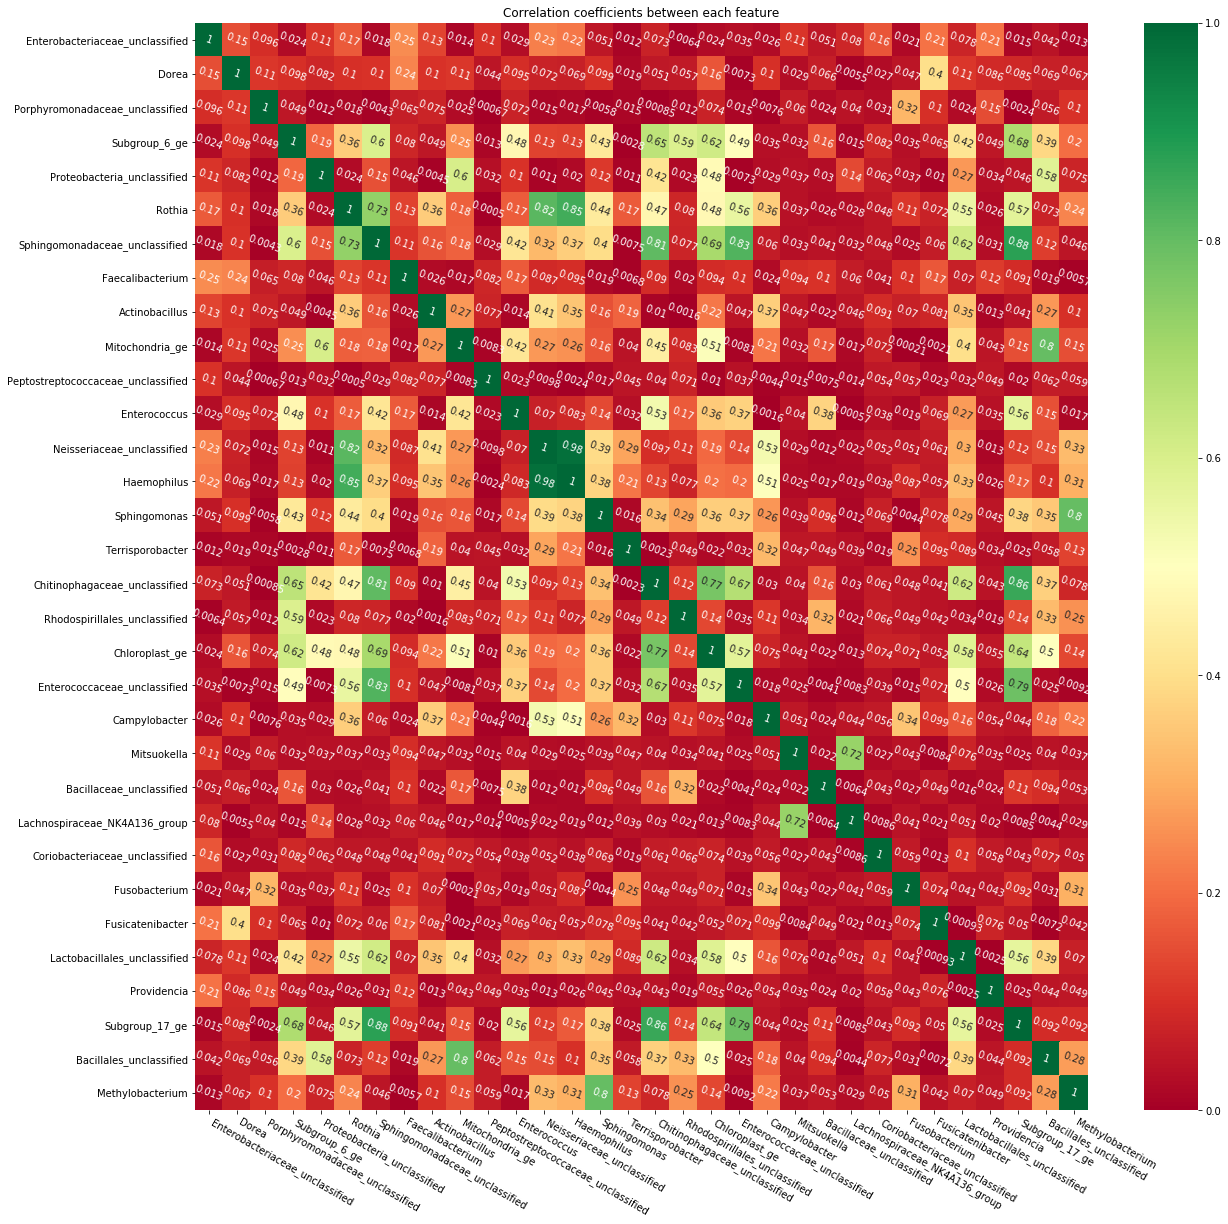

In [25]:
cor = df.corr()

# correlation with output variable
corr_output_mtx = cor['diagnosis'].abs()

# select features with a correlation between 0.12 and 0.22
for cor_target in np.arange(.14, .24, .02):
    
    # features with high correlation with the class
    relv_feat = corr_output_mtx[corr_output_mtx > cor_target]
    print(f"Features with correlation > {cor_target:.2f}: {len(relv_feat)}")
    
    # keep only the feature names and remove the output variable
    relv_feat = relv_feat.index.drop('diagnosis')
    
    # select features that are independent of each other
    relv_feat = indep_feat(relv_feat)
    print(f"Independent features with correlation > {cor_target:.2f}: {len(relv_feat)}")
    
    # write the df with selected features to csv files
    df_ = df[relv_feat.index]
    df_.to_csv(f"..\\data\\genus.reabund_feature_selected\\{cor_target:.2f}_{len(relv_feat)}.csv")

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [7]:
# split train test data
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], 
                                                    df['diagnosis'], 
                                                    test_size=.25)

print(f"""Features: {df.iloc[:,:-1].shape}
      train features: {x_train.shape}
      test features: {x_test.shape}""")

print(f"""Classes: {df['diagnosis'].shape}
      train classes: {y_train.shape}
      test classes: {y_test.shape}""" )

Features: (129, 205)
      train features: (96, 205)
      test features: (33, 205)
Classes: (129,)
      train classes: (96,)
      test classes: (33,)


In [8]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# output of GridSearch
def gridSearch_results(model):
    return f"""Best params: {model.best_params_}
Test set score: {model.score(x_test, y_test): .3f}
Best score on train set: {model.best_score_: .3f}"""

# plot the confusion matrix
def plot_cm(cm, ax, title="Default"):
    
    # plot the confusion matrix
    sns.heatmap(cm,
                annot=True,
                linewidths=5,
                cbar=False,
                xticklabels=["control","cvd"],
                yticklabels=["control","cvd"],
                cmap="Blues",
                ax=ax)
    
    ax.title.set_text(f"Confusion Matrix - {title}")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("Acutal Label")

# plot the roc curve
def plot_roc(prediction, ax, title="Default"):
    
    # plot the roc curve
    fpr, tpr, threshold = roc_curve(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    ax.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    ax.title.set_text(f"ROC Curve - {title}")
    ax.set_xlabel("FPR")
    ax.set_ylabel("TPR")
    ax.title.set_text(f"ROC Curve - {title}")
    ax.plot([0, 1], [0, 1], 'r--', label="Random Guess") # Random Guess
    ax.legend()
    ax.grid(alpha=.2)

## AdaBoost

In [9]:
from sklearn.ensemble import AdaBoostClassifier as ABC

In [10]:
abc_params = {'n_estimators': range(60, 70),
              'algorithm': ('SAMME', 'SAMME.R'),
              'learning_rate': np.arange(.4, 1.6, .2)}

abc = GridSearchCV(ABC(),
                   abc_params,
                   scoring='roc_auc',
                   cv=3,
                   iid=False,
                   n_jobs=-1)

abc.fit(x_train, y_train);

In [11]:
print(gridSearch_results(abc))

Best params: {'algorithm': 'SAMME.R', 'learning_rate': 1.0000000000000002, 'n_estimators': 68}
Test set score:  0.643
Best score on train set:  0.711


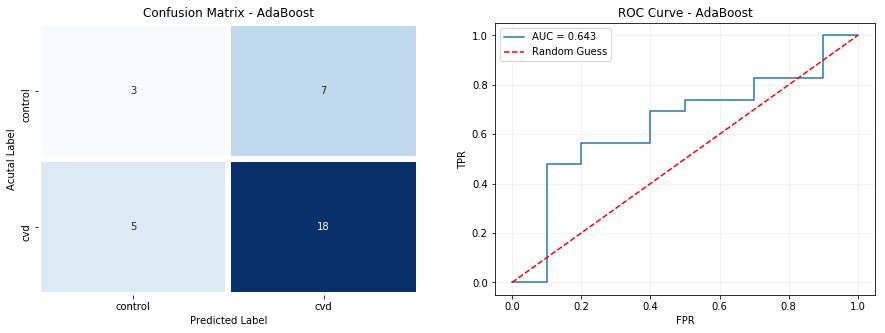

In [12]:
ab_pred = abc.predict(x_test)
ab_pred_prob = abc.predict_proba(x_test)[:,1]

ab_cm = confusion_matrix(y_test, ab_pred)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
plot_cm(ab_cm, axes[0], title="AdaBoost")
plot_roc(ab_pred_prob, axes[1], title="AdaBoost")